In [101]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

url_df = "https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/dataframe_limpio/df.csv"

df_original = pd.read_csv(url_df)
df = df_original
df_corr = df_original
df_corr = df_corr.drop(columns=['SEQN', 'REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'Unnamed: 0', 'Unnamed: 0.1'])

X = df.drop(columns=['SEQN', 'MET_SYM', 'REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'Unnamed: 0', 'Unnamed: 0.1'])
y = df['MET_SYM']

#NHANES

In [102]:
#LO INTRERESANTE

#1. NORMALIZACION
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#2. fijamos componentes
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
X_pca.shape

# 3. Separar datos en train, test, entrada y salida despues del PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=100)

In [110]:
print('Class Distribution (positive to negative): {:.1f}% / {:.1f}%' .format(y_train.mean() * 100, (1-y_train.mean()) * 100))

Class Distribution (positive to negative): 31.6% / 68.4%


In [103]:
X_train.shape

(18942, 20)

In [118]:
#Gabriel Atkin

inputs = tf.keras.Input(shape=(X_pca.shape[1], ))
x = tf.keras.layers.Dense(1024, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = [
               'accuracy',
               tf.keras.metrics.AUC(name = 'auc')
    ]
)

batch_size = 64
epochs = 12

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [
              tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/12
237/237 [==============================] - 11s 42ms/step - loss: 0.3856 - accuracy: 0.8277 - auc: 0.9031 - val_loss: 0.3244 - val_accuracy: 0.8533 - val_auc: 0.9244 - lr: 0.0010
Epoch 2/12
237/237 [==============================] - 8s 35ms/step - loss: 0.3077 - accuracy: 0.8563 - auc: 0.9310 - val_loss: 0.3104 - val_accuracy: 0.8548 - val_auc: 0.9281 - lr: 0.0010
Epoch 3/12
237/237 [==============================] - 8s 35ms/step - loss: 0.3001 - accuracy: 0.8618 - auc: 0.9345 - val_loss: 0.3077 - val_accuracy: 0.8570 - val_auc: 0.9311 - lr: 0.0010
Epoch 4/12
237/237 [==============================] - 8s 35ms/step - loss: 0.2940 - accuracy: 0.8641 - auc: 0.9373 - val_loss: 0.3109 - val_accuracy: 0.8564 - val_auc: 0.9287 - lr: 0.0010
Epoch 5/12
237/237 [==============================] - 8s 35ms/step - loss: 0.2924 - accuracy: 0.8642 - auc: 0.9382 - val_loss: 0.3355 - val_accuracy: 0.8451 - val_auc: 0.9313 - lr: 0.0010
Epoch 6/12
237/237 [==============================] - 9s 36

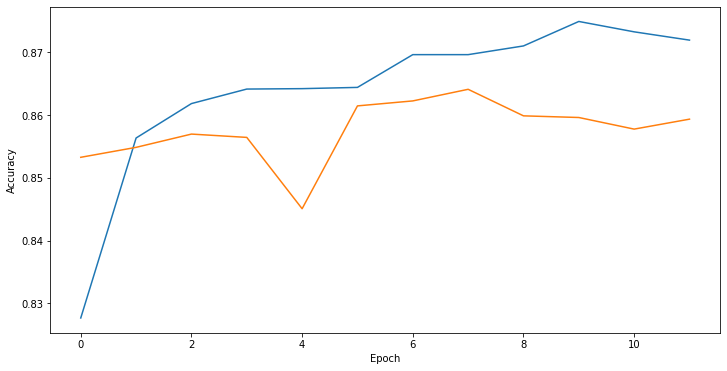

In [119]:
#RESULTS 
plt.figure(figsize = (12,6))

plt.plot(range(epochs), history.history['accuracy'], label = "Training Accuracy")

plt.plot(range(epochs), history.history['val_accuracy'], label = "Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()

In [120]:
model.evaluate(X_test, y_test)

148/148 [==============================] - 2s 9ms/step - loss: 0.3099 - accuracy: 0.8617 - auc: 0.9376


[0.309856653213501, 0.8616976141929626, 0.9376395344734192]

##tro modelo


In [91]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation = 'softmax')
                                   ])

In [92]:
model.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ['mse', 'accuracy']
)

In [93]:
model.fit(X_train, y_train, epochs =8)

Epoch 1/8
592/592 [==============================] - 2s 3ms/step - loss: 0.5135 - mse: 0.3344 - accuracy: 0.8002
Epoch 2/8
592/592 [==============================] - 1s 2ms/step - loss: 0.3476 - mse: 0.3332 - accuracy: 0.8398
Epoch 3/8
592/592 [==============================] - 1s 2ms/step - loss: 0.3260 - mse: 0.3330 - accuracy: 0.8511
Epoch 4/8
592/592 [==============================] - 1s 2ms/step - loss: 0.3148 - mse: 0.3334 - accuracy: 0.8562
Epoch 5/8
592/592 [==============================] - 1s 2ms/step - loss: 0.3120 - mse: 0.3332 - accuracy: 0.8553
Epoch 6/8
592/592 [==============================] - 1s 2ms/step - loss: 0.3059 - mse: 0.3335 - accuracy: 0.8600
Epoch 7/8
592/592 [==============================] - 1s 2ms/step - loss: 0.3049 - mse: 0.3335 - accuracy: 0.8609
Epoch 8/8
592/592 [==============================] - 1s 2ms/step - loss: 0.3025 - mse: 0.3336 - accuracy: 0.8591


In [94]:
model.evaluate(X_test, y_test)

148/148 [==============================] - 0s 2ms/step - loss: 0.2966 - mse: 0.3360 - accuracy: 0.8625


[0.29655221104621887, 0.33604493737220764, 0.8625422120094299]

#LOGISTIC REGRESSION

In [100]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8591638513513513

#TUTORIAL


In [4]:
fashiondata = tf.keras.datasets.mnist

In [13]:
(x_train, y_train), (x_test, y_test) = fashiondata.load_data()

In [16]:
y_train.shape

(60000,)

In [15]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train, x_test = x_train/255, x_test/255

In [45]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(2, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'relu'),
                                   tf.keras.layers.Dense(4),
                                   ])

In [46]:
model.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [48]:
model.fit(X_train, y_train, epochs =5)

Epoch 1/5
592/592 [==============================] - 2s 2ms/step - loss: 6.1010 - accuracy: 0.3946
Epoch 2/5
592/592 [==============================] - 1s 2ms/step - loss: 3.5673 - accuracy: 0.5405
Epoch 3/5
592/592 [==============================] - 1s 2ms/step - loss: 1.4813 - accuracy: 0.5773
Epoch 4/5
592/592 [==============================] - 1s 2ms/step - loss: 1.3863 - accuracy: 0.5774
Epoch 5/5
592/592 [==============================] - 1s 2ms/step - loss: 1.3863 - accuracy: 0.5774


In [49]:
model.evaluate(X_test, y_test)

148/148 [==============================] - 1s 3ms/step - loss: 1.3863 - accuracy: 0.5758


[1.3862926959991455, 0.5758023858070374]